<a href="https://colab.research.google.com/github/hsuecu/data_set/blob/main/UCI_credit_card_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="display:inline-block;position:relative;font-size:64px;background-color: #d9edab;padding:200px 10px;width:100%;text-align:center">UCI Credit Card</span><br><strong style="display:block;font-size:30px;padding-top:20px">PSO</strong>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

import warnings
warnings.filterwarnings('ignore')
!pip3 install optunity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hsuecu/data_set/main/uci_data.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
if __name__=="__main__":
    for i in data.columns:
        data[i].replace('?', np.NAN, inplace=True)

In [ ]:
if __name__=="__main__":
    count = 0
    for i in range(data.shape[0]):
        for j in data.iloc[i].isna():
            if j:
                count += 1
                break
    print(f'Useless row entries are:{round(count/data.shape[0] * 100, 3)}%')

Useless row entries are:0.0%


In [ ]:
data.drop(['ID'], axis=1, inplace=True)

# Base Case Establishment

In [ ]:
X = data.drop(['default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

print(f'X is {X.shape}\nY is {y.shape}')

X is (30000, 23)
Y is (30000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.7)

In [ ]:
print(f'X_train:{X_train.shape}\n\
X_test:{X_test.shape}\n\
y_train:{y_train.shape}\n\
y_test:{y_test.shape}')

X_train:(21000, 23)
X_test:(9000, 23)
y_train:(21000,)
y_test:(9000,)


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

col = X_train.columns
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [ ]:
X_train.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2137,0.842105,0.0,0.0,-1.0,0.142857,0.0,0.0,0.0,0.0,0.0,...,1.070167,1.798310,-0.092465,-0.136520,0.968283,0.710979,6.901453,0.137163,-0.170033,-0.125480
13692,-0.473684,-1.0,-1.0,-1.0,0.928571,0.0,0.0,0.0,0.0,0.0,...,0.591253,0.670285,0.726932,0.754938,0.159642,0.157389,-0.021308,0.070326,0.104026,0.043534
13788,0.210526,0.0,-1.0,0.0,-0.642857,0.0,0.0,0.0,0.0,0.0,...,0.902269,0.931221,0.928303,0.863076,0.347589,0.354896,0.290557,0.402631,0.211221,0.230474


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score,\
f1_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
def analyse(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)
    sk = StratifiedKFold(5, shuffle=True, random_state=0)
    sf_scorer = cross_validate(model, xtrain, ytrain, 
                 scoring=['roc_auc', 'accuracy', 'precision', 'recall', 'f1'],
                 cv=sk)
    accuracy = sf_scorer['test_accuracy'].mean()
    recall = sf_scorer['test_recall'].mean()
    precision = sf_scorer['test_precision'].mean()
    roc_auc = sf_scorer['test_roc_auc'].mean()
    f1score = sf_scorer['test_f1'].mean()
    try:
        y_score_test = model.decision_function(xtest)
        y_score_train = model.decision_function(xtrain)
    except:
        y_score_test = model.predict_proba(xtest)[:,1]
        y_score_train = model.predict_proba(xtrain)[:,1]
    ypred = model.predict(xtest)
    ret = {'train':{'pr auc': average_precision_score(ytrain, y_score_train),
                'accuracy': accuracy,
                'recall':recall,
                'precision':precision,
                'roc auc':roc_auc,
                'f1 score': f1score},
           'test':{'pr auc': average_precision_score(ytest, y_score_test),
                'accuracy':accuracy_score(ytest, ypred),
                'recall':recall_score(ytest, ypred),
                'precision':precision_score(ytest, ypred),
                'roc auc':roc_auc_score(ytest, y_score_test),
                'f1 score': f1_score(ytest, ypred)}}
    return ret

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, auc, precision_recall_curve

def analyseANN(ANNmodel, model, xtrain, ytrain, xtest, ytest):
    
    ypred =  model.predict(xtrain)
    ypred_test = model.predict(xtest)
    precision_train, recall_train, thresholds = precision_recall_curve(ytrain, ypred)
    precision_test, recall_test, thresholds = precision_recall_curve(y_test, ypred_test)

    for i in range(len(ypred)):
        if ypred[i] <=0.5:
            ypred[i] =0
        else: 
            ypred[i] =1
    for i in range(len(ypred_test)):
        if ypred_test[i] <=0.5:
            ypred_test[i] =0
        else: 
            ypred_test[i] =1
    
    #ypred = y_pred_prob.where(y_pred_prob<0.5,0,1 ) 
    accuracy = accuracy_score(ytrain, ypred)
    recall = recall_score(ytrain, ypred)
    precision = precision_score(ytrain, ypred)
    roc_auc = roc_auc_score(ytrain, ypred)
    f1score = f1_score(ytrain, ypred)

    ret = {'train':{'pr auc': auc(recall_train, precision_train),
                    'accuracy': accuracy,
                    'recall':recall,
                    'precision':precision,
                    'roc auc':roc_auc,
                    'f1 score': f1score},
               'test':{'pr auc': auc(recall_test, precision_test),
                    'accuracy':accuracy_score(ytest, ypred_test),
                    'recall':recall_score(ytest, ypred_test),
                    'precision':precision_score(ytest, ypred_test),
                    'roc auc':roc_auc_score(ytest, ypred_test),
                    'f1 score': f1_score(ytest, ypred_test)}}
    
    history_df = pd.DataFrame(ANNmodel.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
    plt.ylim(0.5, 1)
    return ret

# BASE CASE

In [ ]:
##                     ##
## LOGISTIC REGRESSION ##
##                     ##

from sklearn.linear_model import LogisticRegression
import json
lr = LogisticRegression(random_state=42)

print(json.dumps(analyse(lr, X_train, y_train, X_test, y_test), indent=2))

{
  "train": {
    "pr auc": 0.5014275026169067,
    "accuracy": 0.8103809523809524,
    "recall": 0.23722426812483724,
    "precision": 0.7123464820254533,
    "roc auc": 0.7193805439579442,
    "f1 score": 0.3558714924118692
  },
  "test": {
    "pr auc": 0.5090522131601938,
    "accuracy": 0.8092222222222222,
    "recall": 0.23461730865432717,
    "precision": 0.7149390243902439,
    "roc auc": 0.7315065903184416,
    "f1 score": 0.35329566854990585
  }
}


In [ ]:
##                          ##
## RANDOM FOREST CLASSIFIER ##
##                          ##

from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(max_depth=3, random_state=42);

print(json.dumps(analyse(rforest, X_train, y_train, X_test, y_test), indent=2))

{
  "train": {
    "pr auc": 0.54690257055226,
    "accuracy": 0.810142857142857,
    "recall": 0.24951130826172677,
    "precision": 0.6956366639403692,
    "roc auc": 0.7699053325915541,
    "f1 score": 0.36718056071066274
  },
  "test": {
    "pr auc": 0.5484591980289313,
    "accuracy": 0.8085555555555556,
    "recall": 0.23561780890445222,
    "precision": 0.7072072072072072,
    "roc auc": 0.7723268861969907,
    "f1 score": 0.3534709193245779
  }
}


In [ ]:
##                ##
## ANN CLASSIFIER ##
##                ##


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

def create_ann(dense_layers, dense_nodes, learning_rate, dropout_rate):
    ann = Sequential()
    ann.add(Dense(units = dense_nodes, activation='relu', input_shape=[(X_train.shape[1])]))
    ann.add(Dropout(dropout_rate))
    ann.add(BatchNormalization())

    for i in range(dense_layers):
        ann.add(Dense(units = dense_nodes, activation='relu'))
        ann.add(Dropout(dropout_rate))
        ann.add(BatchNormalization())
    
    ann.add(Dense(units = 1, activation='sigmoid')) 
    ann.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['binary_accuracy'])
    return ann

def Model(dense_layers, dense_nodes, learning_rate, dropout_rate, batch_size):
    ann = create_ann(dense_layers, dense_nodes, learning_rate, dropout_rate)
    es = EarlyStopping(min_delta=0.01, patience=10)
    classifier = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size,
                                     epochs=100, verbose=0,callbacks = es)
    return classifier, ann

running for: 7m, 32s


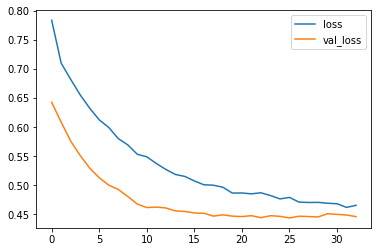

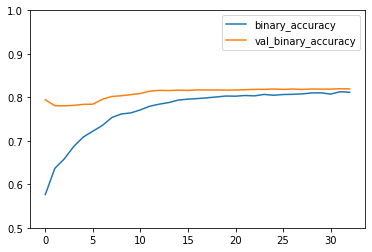

In [ ]:
_start = time.time()

ANNmodel , model= Model(dense_layers =5 , dense_nodes = 1024, learning_rate = 0.0001, dropout_rate = 0.3, batch_size = 1000)
analyseANN(ANNmodel, model, X_train, y_train, X_test, y_test)

_end = time.time()

print(f'running for: {int((_end-_start)/60)}m, {int((_end-_start)%60)}s')

# PSO OPTIMIZED

In [ ]:
import optunity
import optunity.metrics
from bisect import bisect
from sklearn.model_selection import cross_val_score

In [ ]:
from optunity.solvers.util import score
##                     ##
## LOGISTIC REGRESSION ##
##                     ##

search = {
    'penalty':[0, 1], # none l1 l2 elasticnet
    'tol': [0, 10], # tolerance for stopping
    'C': [0.1, 40], # inverse of regularization strength
    'intercept_scaling': [1, 50], #to lessen the effect of regularization
                                  #on synthetic feature weight this must be increased
    'l1_ratio':[0, 1]
}

data = X.values.tolist()
labels = y.values.tolist()

@optunity.cross_validated(x=data, y=labels, num_folds=3)

def performance_lr(x_train, y_train, x_test, y_test,
                  penalty=None, tol=None, C=None,
                  intercept_scaling=None, l1_ratio=None):
    def mapper(f, breakpoint=[], cat=[]):
        return cat[bisect(breakpoint, f)]
    
    penalty=mapper(penalty, breakpoint=[0.25, 0.5, 0.75],
                   cat=['none', 'l1', 'l2', 'elasticnet'])
    
    model = LogisticRegression(penalty=penalty, tol=tol, C=C,
                               intercept_scaling=intercept_scaling, l1_ratio=l1_ratio,
                               solver='saga', n_jobs=-1, random_state=42)
    
    scores = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    scoring='roc_auc'))
    return scores

In [ ]:
_start = time.time()

optimal_confg, info, _ = optunity.maximize(performance_lr,
                                           solver_name='particle swarm',
                                           num_evals=50,
                                           **search)

_end = time.time()

print(f'running for: {int((_end-_start)/60)}m, {int((_end-_start)%60)}s')

running for: 0m, 43s


In [ ]:
def mapper(f, breakpoint=[], cat=[]):
        return cat[bisect(breakpoint, f)]

optimal_config_format = optimal_confg
optimal_config_format['penalty'] = mapper(optimal_config_format['penalty'],
                                          breakpoint=[0.25, 0.5, 0.75],
                                          cat=['none', 'l1', 'l2', 'elasticnet'])

In [ ]:
print(json.dumps(optimal_config_format, indent=2))
print(info.optimum)

{
  "penalty": "elasticnet",
  "tol": 0.12265624999999991,
  "C": 16.17533593750001,
  "intercept_scaling": 21.888108515751707,
  "l1_ratio": 0.1410192374266103
}
0.6391167765403445


In [ ]:
final_lr_model = LogisticRegression(solver='saga',penalty='elasticnet', tol=0.12265624999999991, C=16.175335937500001, intercept_scaling=21.888108515751707, l1_ratio=0.1410192374266103)
print(json.dumps(analyse(final_lr_model, X_train, y_train, X_test, y_test), indent=2))

{
  "train": {
    "pr auc": 0.44985807233557834,
    "accuracy": 0.7957619047619048,
    "recall": 0.34353797009262366,
    "precision": 0.5613555068613455,
    "roc auc": 0.690772041741399,
    "f1 score": 0.42615274291990185
  },
  "test": {
    "pr auc": 0.45518431931352626,
    "accuracy": 0.7977777777777778,
    "recall": 0.3486743371685843,
    "precision": 0.5736625514403292,
    "roc auc": 0.6987183779005629,
    "f1 score": 0.4337274424393279
  }
}


In [ ]:
##                          ##
## RANDOM FOREST CLASSIFIER ##
##                          ##

search = {
    'n_estimators': [10, 100],
    'criterion':[0, 1],
    'max_depth':[3, 10],
    'max_leaf_nodes':[1, 100],
    'max_features':[0, 1],
    'min_weight_fraction_leaf':[0, 0.5]
}

data = X.values.tolist()
labels = y.values.tolist()

@optunity.cross_validated(x=data, y=labels, num_folds=3)

def performance_rf(x_train, y_train, x_test, y_test,
                  n_estimators=None,
                  criterion=None,
                  max_depth=None,
                  max_leaf_nodes=None,
                  max_features=None,
                  min_weight_fraction_leaf=None):
    def mapper(f, breakpoint=[], cat=[]):
        return cat[bisect(breakpoint, f)]
    
    criterion=mapper(criterion, breakpoint=[0.5],
                    cat=['gini', 'entropy'])
    max_features=mapper(max_features, breakpoint=[0.33, 0.66],
                       cat=['sqrt', 'log2', None])
    
    model=RandomForestClassifier(n_estimators=int(n_estimators),
                                criterion=criterion,
                                max_depth=max_depth,
                                max_leaf_nodes=int(max_leaf_nodes),
                                max_features=max_features,
                                min_weight_fraction_leaf=min_weight_fraction_leaf,
                                n_jobs=-1,
                                random_state=42)
    scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    scoring='roc_auc', error_score='raise'))
    return scores

In [ ]:
_start = time.time()

optimal_confg, info, _ = optunity.maximize(performance_rf,
                                           solver_name='particle swarm',
                                           num_evals=50,
                                           **search)

_end = time.time()

print(f'running for: {int((_end-_start)/60)}m, {int((_end-_start)%60)}s')

running for: 4m, 51s


In [ ]:
def mapper(f, breakpoint=[], cat=[]):
        return cat[bisect(breakpoint, f)]

optimal_config_format = optimal_confg.copy()
optimal_config_format['criterion'] = mapper(optimal_config_format['criterion'],
                                          breakpoint=[0.5],
                                          cat=['gini', 'entropy'])

optimal_config_format['max_features'] = mapper(optimal_config_format['max_features'],
                                         breakpoint=[0.33, 0.66],
                                         cat=['sqrt', 'log2', None])

In [ ]:
print(json.dumps(optimal_config_format, indent=2))
print(f'best cv_score:{info.optimum}')

{
  "n_estimators": 25.589904107204177,
  "criterion": "entropy",
  "max_depth": 6.093808593749999,
  "max_leaf_nodes": 59.446132705125024,
  "max_features": "log2",
  "min_weight_fraction_leaf": 0.028037109375000008
}
best cv_score:0.7746569795017016


In [ ]:
optimal_config_format['n_estimators'] = int(optimal_config_format['n_estimators'])
optimal_config_format['max_leaf_nodes'] = int(optimal_config_format['max_leaf_nodes'])


final_rf = RandomForestClassifier(n_jobs=-1,random_state=42,**optimal_config_format)

In [ ]:
print(json.dumps(analyse(final_rf, X_train, y_train, X_test, y_test), indent=2))

{
  "train": {
    "pr auc": 0.5462240278546093,
    "accuracy": 0.8078571428571429,
    "recall": 0.21996498716661086,
    "precision": 0.7099951082635598,
    "roc auc": 0.7746341316652428,
    "f1 score": 0.33561173794977417
  },
  "test": {
    "pr auc": 0.5410502600279398,
    "accuracy": 0.8082222222222222,
    "recall": 0.2206103051525763,
    "precision": 0.7241379310344828,
    "roc auc": 0.776815453863198,
    "f1 score": 0.3381901840490798
  }
}
